In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)
coordinates

[(33.59758109133027, 110.36836240599138),
 (64.51354419463269, 60.83565269236195),
 (-31.446987935987273, 107.6029516893783),
 (53.69112498570615, 111.26051418922412),
 (54.54343423899266, -9.52115473074221),
 (-73.96386240006713, 87.15936403648539),
 (57.70717990156251, 72.48750448162852),
 (-5.888245440698114, 127.85277844125022),
 (-80.82867436527157, -75.4295101065784),
 (-12.02023859901287, 179.2788275212913),
 (-83.71236128179962, -130.70439256401957),
 (-40.70493319099077, 94.13869041076504),
 (69.78972371760443, -99.68703156934401),
 (-42.66117151284195, 127.44640541381932),
 (18.683498876955056, -32.56240864637843),
 (25.903145630888446, 127.48610468819919),
 (-64.41525294245892, 17.7591274829621),
 (-17.758831956221144, 104.98845010141804),
 (-59.62830220720155, 77.87941321876372),
 (63.50884873682776, -52.0281733187105),
 (3.059634219582847, 86.29672363771772),
 (-40.14376661227389, -126.15642750193187),
 (-33.90569145509666, 118.57304816484248),
 (-40.196901872572646, 57.06

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [7]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print ()

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shiyan
Processing Record 2 of Set 1 | verkhnyaya inta
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | kurumkan
Processing Record 5 of Set 1 | ballina
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | tevriz
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | itoman
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | banjar
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | nuuk
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of 

Processing Record 38 of Set 4 | envira
Processing Record 39 of Set 4 | walla walla
Processing Record 40 of Set 4 | phalodi
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | bonthe
Processing Record 43 of Set 4 | syracuse
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | aripuana
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | juybar
Processing Record 48 of Set 4 | luba
Processing Record 49 of Set 4 | ligayan
Processing Record 50 of Set 4 | plast
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | englewood
Processing Record 4 of Set 5 | revelstoke
Processing Record 5 of Set 5 | fort saint john
City not found. Skipping...
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | cartagena del chaira
Processing Record 8 of Set 5 | morgan city
Processing Record 9 of Set 5 | macas
Processing Record 10 of Set 5 | rajsamand
Processing

Processing Record 29 of Set 8 | wanning
Processing Record 30 of Set 8 | redmond
Processing Record 31 of Set 8 | poya
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | mayumba
Processing Record 34 of Set 8 | buariki
City not found. Skipping...
Processing Record 35 of Set 8 | liverpool
Processing Record 36 of Set 8 | ous
Processing Record 37 of Set 8 | saint anthony
Processing Record 38 of Set 8 | zhireken
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | vrangel
Processing Record 41 of Set 8 | hoi an
Processing Record 42 of Set 8 | nome
Processing Record 43 of Set 8 | sesheke
Processing Record 44 of Set 8 | prainha
Processing Record 45 of Set 8 | callaway
Processing Record 46 of Set 8 | tierralta
Processing Record 47 of Set 8 | walvis bay
Processing Record 48 of Set 8 | kawalu
Processing Record 49 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 8 | sovetskiy
Processing Record 1 of Set 

Processing Record 19 of Set 12 | buraydah
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | jijiga
Processing Record 22 of Set 12 | salym
Processing Record 23 of Set 12 | assiniboia
Processing Record 24 of Set 12 | chiang khong
Processing Record 25 of Set 12 | pueblo nuevo
Processing Record 26 of Set 12 | corpus christi
Processing Record 27 of Set 12 | maykain
City not found. Skipping...
Processing Record 28 of Set 12 | forestville
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | college
Processing Record 31 of Set 12 | payson
Processing Record 32 of Set 12 | vysokogornyy
Processing Record 33 of Set 12 | lincolnwood
Processing Record 34 of Set 12 | kibala
Processing Record 35 of Set 12 | katsuura
Processing Record 36 of Set 12 | saint-francois
Processing Record 37 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 38 of Set 12 | raudeberg
Processing Record 39 of Set 12 | dedza
Processing Record 40 of Set 12 | fossano
-

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
#len(cities)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shiyan,32.6475,110.7781,75.85,97,100,2.59,CN,2021-07-21 22:13:39
1,Verkhnyaya Inta,65.9811,60.3094,53.26,84,92,12.28,RU,2021-07-21 22:13:39
2,Geraldton,-28.7667,114.6000,57.61,94,90,0.00,AU,2021-07-21 22:11:13
3,Kurumkan,54.3000,110.3000,63.68,76,100,0.07,RU,2021-07-21 22:13:40
4,Ballina,-28.8667,153.5667,46.78,65,7,10.16,AU,2021-07-21 22:13:40
5,Busselton,-33.6500,115.3333,49.05,75,66,6.87,AU,2021-07-21 22:13:41
6,Tevriz,57.5090,72.4042,60.82,80,23,5.75,RU,2021-07-21 22:12:13
7,Ambon,-3.6954,128.1814,75.34,94,40,5.75,ID,2021-07-21 22:13:41
8,Ushuaia,-54.8000,-68.3000,37.06,65,90,6.91,AR,2021-07-21 22:13:41
9,Asau,46.4333,26.4000,63.95,65,100,5.12,RO,2021-07-21 22:13:42


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = city_data_df.reindex(columns=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed'])
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shiyan,CN,2021-07-21 22:13:39,32.6475,110.7781,75.85,97,100,2.59
1,Verkhnyaya Inta,RU,2021-07-21 22:13:39,65.9811,60.3094,53.26,84,92,12.28
2,Geraldton,AU,2021-07-21 22:11:13,-28.7667,114.6000,57.61,94,90,0.00
3,Kurumkan,RU,2021-07-21 22:13:40,54.3000,110.3000,63.68,76,100,0.07
4,Ballina,AU,2021-07-21 22:13:40,-28.8667,153.5667,46.78,65,7,10.16
5,Busselton,AU,2021-07-21 22:13:41,-33.6500,115.3333,49.05,75,66,6.87
6,Tevriz,RU,2021-07-21 22:12:13,57.5090,72.4042,60.82,80,23,5.75
7,Ambon,ID,2021-07-21 22:13:41,-3.6954,128.1814,75.34,94,40,5.75
8,Ushuaia,AR,2021-07-21 22:13:41,-54.8000,-68.3000,37.06,65,90,6.91
9,Asau,RO,2021-07-21 22:13:42,46.4333,26.4000,63.95,65,100,5.12


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

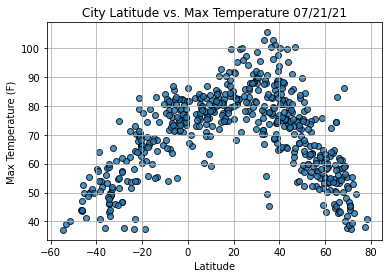

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs._Max_Temp.png")

# Show plot.
plt.show()

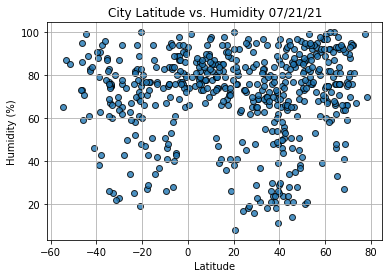

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs._Humidity.png")

# Show plot.
plt.show()

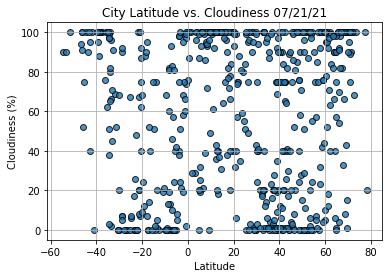

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs._Cloudiness.png")

# Show plot.
plt.show()

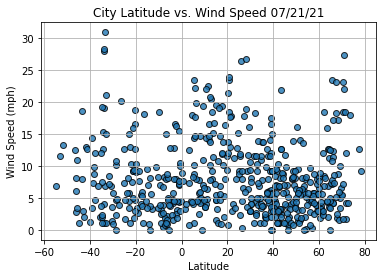

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs._Wind_Speed.png")

# Show plot.
plt.show()